# Reconhecimento de desenhos

## Importando as bibliotecas necessárias

In [6]:
%tensorflow_version 2.x

In [7]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import math
import datetime
import platform
import pathlib
import random

## Visualizando os datasets presentes na biblioteca do tensorflow

Fonte: https://www.tensorflow.org/datasets/catalog/quickdraw_bitmap

Visualização: https://knowyourdata-tfds.withgoogle.com/#tab=STATS&dataset=quickdraw_bitmap

In [8]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiabank',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 

## Carregando o dataset referente ao quickdraw do Google

In [9]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [10]:
DATASET_NAME = 'quickdraw_bitmap'

dataset, dataset_info = tfds.load(
    name=DATASET_NAME,
    data_dir='data',
    with_info=True,
    shuffle_files=True,
    split=tfds.Split.TRAIN,
)

## Validando informações referente ao dataset

In [11]:
dataset_info

tfds.core.DatasetInfo(
    name='quickdraw_bitmap',
    version=3.0.0,
    description='The Quick Draw Dataset is a collection of 50 million drawings across 345 categories, contributed by players of the game Quick, Draw!. The bitmap dataset contains these drawings converted from vector format into 28x28 grayscale images',
    homepage='https://github.com/googlecreativelab/quickdraw-dataset',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=345),
    }),
    total_num_examples=50426266,
    splits={
        'train': 50426266,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{DBLP:journals/corr/HaE17,
      author    = {David Ha and
                   Douglas Eck},
      title     = {A Neural Representation of Sketch Drawings},
      journal   = {CoRR},
      volume    = {abs/1704.03477},
      year      = {2017},
      url       = {http://arxiv.org/abs/1704.03477

## Análise Exploratória dos Dados (EDA)

In [12]:
image_shape = dataset_info.features['image'].shape
num_classes = dataset_info.features['label'].num_classes
num_examples = dataset_info.splits['train'].num_examples

print('num_examples: ', num_examples)
print('image_shape: ', image_shape)
print('num_classes: ', num_classes)

num_examples:  50426266
image_shape:  (28, 28, 1)
num_classes:  345


In [13]:
label_index_to_string = dataset_info.features['label'].int2str

classes = []

for class_index in range(num_classes):
    classes.append(label_index_to_string(class_index))
    
print('classes num:', len(classes))
print('classes:\n\n', classes)

classes num: 345
classes:

 ['aircraft carrier', 'airplane', 'alarm clock', 'ambulance', 'angel', 'animal migration', 'ant', 'anvil', 'apple', 'arm', 'asparagus', 'axe', 'backpack', 'banana', 'bandage', 'barn', 'baseball bat', 'baseball', 'basket', 'basketball', 'bat', 'bathtub', 'beach', 'bear', 'beard', 'bed', 'bee', 'belt', 'bench', 'bicycle', 'binoculars', 'bird', 'birthday cake', 'blackberry', 'blueberry', 'book', 'boomerang', 'bottlecap', 'bowtie', 'bracelet', 'brain', 'bread', 'bridge', 'broccoli', 'broom', 'bucket', 'bulldozer', 'bus', 'bush', 'butterfly', 'cactus', 'cake', 'calculator', 'calendar', 'camel', 'camera', 'camouflage', 'campfire', 'candle', 'cannon', 'canoe', 'car', 'carrot', 'castle', 'cat', 'ceiling fan', 'cell phone', 'cello', 'chair', 'chandelier', 'church', 'circle', 'clarinet', 'clock', 'cloud', 'coffee cup', 'compass', 'computer', 'cookie', 'cooler', 'couch', 'cow', 'crab', 'crayon', 'crocodile', 'crown', 'cruise ship', 'cup', 'diamond', 'dishwasher', 'divin

In [14]:
print(dataset)

<_OptionsDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>


In [15]:
def dataset_head(ds):
    for example in ds.take(1):
        image = example['image']
        label = example['label']

        class_index = label.numpy()
        class_name = label_index_to_string(class_index)

        print('{} ({})'.format(class_name, class_index), '\n')
        print('Image shape: ', image.shape, '\n')
        print(np.reshape(image.numpy(), (28, 28)), '\n')

In [17]:
dataset_head(dataset)

string bean (292) 

Image shape:  (28, 28, 1) 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  58
   90   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  66 254
  255  60   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  19 168 237 255
  255  64   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  10 199 255 255 249
  244   6   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 168 250 253 255 224
  181   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  51 254 187 255 253 254
  112   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 177 232  42 220 221 255
   42   0   0   0   0   0   0   0   0   0]
 [  0   0   0   

## Normalize dataset

In [18]:
def normalize_example(example):
    image = example['image']
    label = example['label']
    label = tf.one_hot(label, len(classes))
    
    image = tf.math.divide(image, 255)
    
    return (image, label)

In [19]:
def augment_example(image, label):
    image = tf.image.random_flip_left_right(image)
    return (image, label)

In [20]:
dataset_normalized = dataset.map(normalize_example).map(augment_example)

In [21]:
for (image, label) in dataset_normalized.take(1):
    class_index = tf.math.argmax(label).numpy()
    class_name = label_index_to_string(class_index)

    print('{} ({})'.format(class_name, class_index), '\n')
    print('Image shape: ', image.shape, '\n')
    print(np.reshape(image.numpy(), (28, 28)), '\n')

compass (76) 

Image shape:  (28, 28, 1) 

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.03137255 0.8862745
  0.36862746 0.13333334 0.13333334 0.13333334 0.10588235 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.180

## Preparando os dados de treino, validação e teste

In [22]:
data_ds = tf.data.Dataset.range(10)
print('tmp_ds:', list(data_ds.as_numpy_iterator()))

data_ds_test = data_ds.take(2)
print('tmp_ds_test:', list(data_ds_test.as_numpy_iterator()))

data_ds_val = data_ds.skip(2).take(3)
print('tmp_ds_val:', list(data_ds_val.as_numpy_iterator()))

data_ds_train = data_ds.skip(2 + 3)
print('tmp_ds_train:', list(data_ds_train.as_numpy_iterator()))

tmp_ds: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
tmp_ds_test: [0, 1]
tmp_ds_val: [2, 3, 4]
tmp_ds_train: [5, 6, 7, 8, 9]


In [23]:
test_dataset_batches = 1
val_dataset_batches = 1

batch_size = 2000
prefetch_buffer_batches = 10

epochs = 30
steps_per_epoch = 30

In [24]:
dataset_batched = dataset_normalized.batch(batch_size=batch_size)

## Criando dataset de teste

In [25]:
dataset_test = dataset_batched \
    .take(test_dataset_batches)

## Criando dataset de validação

In [26]:
dataset_val = dataset_batched \
    .skip(test_dataset_batches) \
    .take(val_dataset_batches)

## Criando dataset de treino

In [27]:
dataset_train = dataset_batched \
    .skip(test_dataset_batches + val_dataset_batches) \
    .prefetch(buffer_size=prefetch_buffer_batches) \
    .repeat()

In [28]:
for (image_test, label_test) in dataset_test.take(1):
    print('label_test.shape: ', label_test.shape)
    print('image_test.shape: ', image_test.shape)
    
print()    
    
for (image_val, label_val) in dataset_val.take(1):
    print('label_val.shape: ', label_val.shape)
    print('image_val.shape: ', image_val.shape)    
    
print()    
    
for (image_train, label_train) in dataset_train.take(1):
    print('label_train.shape: ', label_train.shape)
    print('image_train.shape: ', image_train.shape)    

label_test.shape:  (2000, 345)
image_test.shape:  (2000, 28, 28, 1)

label_val.shape:  (2000, 345)
image_val.shape:  (2000, 28, 28, 1)

label_train.shape:  (2000, 345)
image_train.shape:  (2000, 28, 28, 1)


In [29]:
def get_dataset_classes_hist(dataset, classes, batches_num):
    mentions = {class_name: 0 for class_name in classes}
    for examples, labels in dataset.take(batches_num):
        for label in labels:
            class_name = classes[tf.math.argmax(label).numpy()]
            mentions[class_name] += 1    
    return mentions

In [30]:
mentions = get_dataset_classes_hist(
    dataset_train,
    classes,
    batches_num=steps_per_epoch
)

In [31]:
for class_name in mentions:
    print('{:15s}: {}'.format(class_name, mentions[class_name]))

aircraft carrier: 134
airplane       : 187
alarm clock    : 159
ambulance      : 194
angel          : 181
animal migration: 143
ant            : 146
anvil          : 167
apple          : 165
arm            : 156
asparagus      : 218
axe            : 157
backpack       : 145
banana         : 406
bandage        : 173
barn           : 171
baseball bat   : 136
baseball       : 153
basket         : 136
basketball     : 152
bat            : 152
bathtub        : 227
beach          : 143
bear           : 167
beard          : 211
bed            : 117
bee            : 151
belt           : 231
bench          : 159
bicycle        : 161
binoculars     : 138
bird           : 160
birthday cake  : 176
blackberry     : 146
blueberry      : 165
book           : 141
boomerang      : 157
bottlecap      : 190
bowtie         : 155
bracelet       : 144
brain          : 166
bread          : 134
bridge         : 162
broccoli       : 145
broom          : 136
bucket         : 145
bulldozer      : 240
bus        

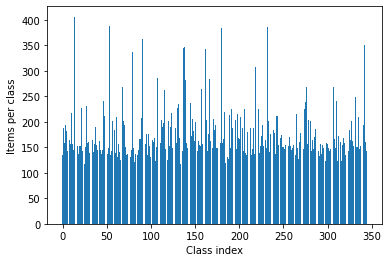

In [32]:
mantions_x = [class_index for class_index, class_name in enumerate(classes)]
mantions_bars = [mentions[class_name] for class_name in mentions]

plt.bar(mantions_x, mantions_bars)
plt.xlabel('Class index')
plt.ylabel('Items per class')
plt.show()

## Criando modelo

In [33]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=image_shape,
    kernel_size=5,
    filters=32,
    padding='same',
    activation=tf.keras.activations.relu
))
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=2,
    strides=2
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=3,
    filters=32,
    padding='same',
    activation=tf.keras.activations.relu,
))
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=2,
    strides=2
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=3,
    filters=64,
    padding='same',
    activation=tf.keras.activations.relu
))
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=2,
    strides=2
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=512,
    activation=tf.keras.activations.relu
))

model.add(tf.keras.layers.Dense(
    units=num_classes,
    activation=tf.keras.activations.softmax
))

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 64)         0

In [35]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.003)
rms_prop_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

## Treinando

In [36]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    patience=5,
    monitor='val_accuracy',
    restore_best_weights=True,
    verbose=1
)

In [37]:
training_history = model.fit(
    x=dataset_train,
    epochs=epochs,
    steps_per_epoch=steps_per_epoch,
    validation_data=dataset_val,
    callbacks=[
        early_stopping_callback
    ]
)

Epoch 1/30
30/30 [==============================] - 77s 2s/step - loss: 5.0994 - accuracy: 0.0575 - val_loss: 4.2184 - val_accuracy: 0.1435
Epoch 2/30
30/30 [==============================] - 71s 2s/step - loss: 3.8776 - accuracy: 0.2016 - val_loss: 3.4904 - val_accuracy: 0.2680
Epoch 3/30
30/30 [==============================] - 74s 2s/step - loss: 3.2985 - accuracy: 0.2871 - val_loss: 3.0440 - val_accuracy: 0.3405
Epoch 4/30
30/30 [==============================] - 71s 2s/step - loss: 2.9533 - accuracy: 0.3481 - val_loss: 2.8301 - val_accuracy: 0.3705
Epoch 5/30
30/30 [==============================] - 71s 2s/step - loss: 2.7675 - accuracy: 0.3837 - val_loss: 2.7561 - val_accuracy: 0.3980
Epoch 6/30
30/30 [==============================] - 71s 2s/step - loss: 2.6035 - accuracy: 0.4157 - val_loss: 2.5603 - val_accuracy: 0.4250
Epoch 7/30
30/30 [==============================] - 72s 2s/step - loss: 2.5097 - accuracy: 0.4317 - val_loss: 2.5497 - val_accuracy: 0.4345
Epoch 8/30
30/30 [==

In [38]:
def render_training_history(training_history):
    loss = training_history.history['loss']
    val_loss = training_history.history['val_loss']

    accuracy = training_history.history['accuracy']
    val_accuracy = training_history.history['val_accuracy']

    plt.figure(figsize=(14, 4))

    plt.subplot(1, 2, 1)
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.plot(val_loss, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.subplot(1, 2, 2)
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(accuracy, label='Training set')
    plt.plot(val_accuracy, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.show()

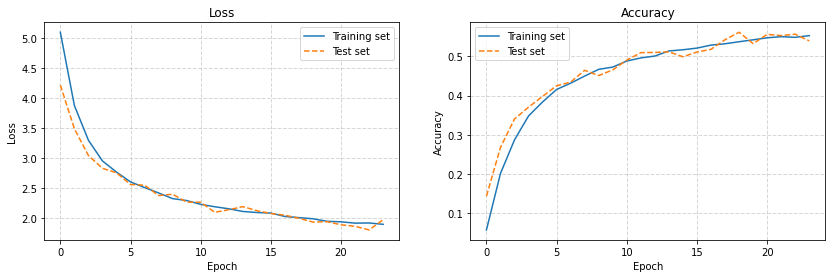

In [39]:
render_training_history(training_history)

## Salvando modelo

In [41]:
model_name = 'recognition_model.h5'
model.save(model_name, save_format='h5')